# **ANALISIS SENTIMEN DAN STRATEGI PERBAIKAN LAYANAN PROVIDER Z**
---
- Kelompok 3 :
    + Alfidhiya Amany R.
    + Derielle Aisyah A.
    + Hasson Josia
- JCDS 2602 - BSD

## **🔍 Latar Belakang**
Perusahaan telekomunikasi Z menghadapi tantangan yang sangat kompetitif. Kualitas layanan yang diberikan menentukan kepuasan pelanggan dan menjadi kunci utama untuk mempertahankan serta meningkatkan loyalitas pelanggan. Disisi lain, pelanggan di era digital ini lebih vokal dalam mengungkapkan berbagai macam keluhan dan harapannya terhadap layanan dari Provider Z menggunakan media sosial. Salah satu media sosial yang dipergunakan untuk mengungkapkan keluhan dan harapan adalah media sosial X.com (dulunya twitter). 
Berbagai aspirasi mayarakat pelanggan provider Z dituangkan dalam cuitan-cuitan di X.com.

Data teks dari media sosial sejatinya mengandung banyak sekali informasi namun dalam bentuk tidak terstruktur. Tanpa adanya pendekatan analisis yang tepat, data teks tersebut hanya akan menjadi sekedar tulisan tidak penting. Oleh karenanya, digunakan pendekatan Natural Language Processing (NLP) untuk membantu perusahaan telekomunikasi Z memproses kumpulan cuitan di sosial media X menjadi informasi yang memuat topik tulisan, emosi dari pelanggan, serta tren dari perbincangan. 

Melalui analisis menggunakan NLP, diharapkan perusahaan dapat melihat insight mengenai keluhan apa saja yang diutarakan oleh pelanggan, sehingga perusahaan dapat melakukan perbaikan maupun peningkatan yang menjadi respon dari aspirasi yang tertampung. Rekomendasi yang disusun berdasarkan analisis data yang tepat akan dapat meningkatkan layanan dan citra perusahaan kedepannya.

## **❔ Rumusan Masalah**

Untuk dapat mengetahui bagaimana sentimen pelanggan yang tertuang dalam suatu media sosial seperti X, perlu dilakukan analisis NLP yang tepat sehingga mampu menjawab pertanyaan sebagai berikut. :

1.  Apa saja topik utama mengenai Provider Z yang diungkapkan oleh pelanggan?
2. Bagaimana persepsi pelanggan terhadap layanan pada Provider Z?
3. Apa strategi perbaikan yang dapat diterapkan oleh perusaan telekomunikasi Z untuk merespon sentimen-sentimen tersebut?

## **🚀 Tujuan**
1. Menganalisis sentimen masyarakat terhadap layanan Provider X berdasarkan data teks dari sosial media X.com.
2. Mengidentifikasi topik yang sering muncul dalam aspirasi masyarakat.
3. Memberikan rekomendasi untuk dapat meningkatkan layanan serta reputasi perusahaan provider Z berdasarkan hasil analisis yang dilakukan.

## **🧠 Data Understanding**
- `Id` : Nomor unik identifikasi setiap tweet untuk membedakan satu entri dengan entri lainnya.
- `Sentiment` : Label sentimen dari dataset.
    + `positive` --> Teks tweet bernada positif/apresiasi layanan.
    + `negative` --> Teks tweet bernada negatif/keluhan/kritik layanan.
    + `neutral` --> Teks tweet bernada yang tidak dapat dikategorikan positive maupun negative.
- `Text Tweet` : Teks asli dari sosial media X.com (nama pengguna dan nama provider disembunyikan)

## **📝Natural Language Processing (NLP) in Python**

### **⚙️ Data Preprocessing 1**

#### **1. Library Import**

In [57]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 

import re # regular expression REgex
import string # untuk operasi string
import nltk
from sklearn.feature_extraction.text import TfidfVectorizer # TF-IDF
from nltk.tokenize import word_tokenize # tokenisasi 
from nltk.corpus import stopwords # deteksi stopword

#pd.set_option('display.max_row', None) # Melihat semua baris teks
pd.set_option('display.max_colwidth', None) # Melihat semua kalimat pada setiap baris teks
import warnings
warnings.filterwarnings('ignore')

#### **2. Extract Corpus**

In [58]:
df = pd.read_csv('dataset_tweet_sentiment_cellular_service_provider.csv')
df

,Id,Sentiment,Text Tweet
0,1,positive,<USER_MENTION> #BOIKOT_<PROVIDER_NAME> Gunakan Produk Bangsa Sendiri <PROVIDER_NAME>
1,2,positive,"Saktinya balik lagi, alhamdulillah :v <PROVIDER_NAME>"
2,3,negative,Selamat pagi <PROVIDER_NAME> bisa bantu kenapa di dalam kamar sinyal 4G hilang yang 1 lagi panggilan darurat saja <URL>
3,4,negative,Dear <PROVIDER_NAME> akhir2 ini jaringan data lemot banget padahal H+ !!!!
4,5,negative,Selamat malam PENDUSTA <PROVIDER_NAME>
...,...,...,...
295,296,positive,"Pantesan lancar ya, sinyal <PROVIDER_NAME> yang 4G lancar sekali di lombok timur"
296,297,positive,Alhamdulillah lancar pakai <PROVIDER_NAME>
297,298,positive,"Untung pakai internet <PROVIDER_NAME>, lancar, jadi dapat banyak ide."
298,299,positive,"di tempat ramai seperti di lokasi wisata, <PROVIDER_NAME> tetap jaya."


#### **3. Case Folding**
Case folding merupakan menyamakan bentuk huruf di dalam teks agar huruf berbentuk kecil seragam (lowercase) sehingga tidak akan terjadi pembacaan istilah yang berbeda akibat bentuk huruf berbeda.

In [59]:
df['text lower'] = df['Text Tweet'].str.lower()

In [60]:
df.sample(5, random_state=42)

,Id,Sentiment,Text Tweet,text lower
203,204,positive,sinyal 4G <PROVIDER_NAME> dipalembang lancar,sinyal 4g <provider_name> dipalembang lancar
266,267,negative,<PROVIDER_NAME> Hooq sangat tidak bermanfaat. Beli kuota bisa menonton di youtube gak perlu Hooq #rugi <PRODUCT_NAME> #kuota <PROVIDER_NAME>,<provider_name> hooq sangat tidak bermanfaat. beli kuota bisa menonton di youtube gak perlu hooq #rugi <product_name> #kuota <provider_name>
152,153,negative,ayo penuhi viralkan keras #Boikot<PROVIDER_NAME>! Nomor sy nomer <PROVIDER_NAME> cantik dr th2007 lgsg sy buang!Jgn main2 dg umat Islam yg brsatu,ayo penuhi viralkan keras #boikot<provider_name>! nomor sy nomer <provider_name> cantik dr th2007 lgsg sy buang!jgn main2 dg umat islam yg brsatu
9,10,negative,#Bilboard iklan <PROVIDER_NAME> kok ada pesan tersembunyi? #Boikot<PROVIDER_NAME> #Ramadhan <URL>,#bilboard iklan <provider_name> kok ada pesan tersembunyi? #boikot<provider_name> #ramadhan <url>
233,234,positive,<PROVIDER_NAME> ayo kamu bisa,<provider_name> ayo kamu bisa


#### **4. Text Cleansing**
Merupakan proses pembersihan data dari atribut yang tidak diperlukan, antara lain:
- `<user_mention>`
- `<url>`
- `<provider_name>`
- `RT`
- `<product_name>`
- `.`
- Non ASCII ex: `emoticon`
- `Digit`
- `Punctuation`
- `Remove white space` (multiple)

👇 **Regular Function Untuk Menghilangkan Atribut yang Tidak diperlukan**

In [61]:
def text_cleaning(text):
    text = text.lower()
    text = text.replace('<user_mention>', '')
    text = text.replace('<url>', '')
    text = text.replace('<provider_name>', '')
    text = text.replace('RT','')
    text = text.replace('<product_name>', '')
    
    
    
    text = text.replace('..', ' ')
    text = text.replace('...', ' ')
    text = text.replace('....', ' ')
    
    text = text.encode('ascii', 'replace').decode('ascii') # remove non ASCII (emoticon, chinese word, .etc)
    text = text.replace(r'\d+', "") # remove digits
    text = text.translate(str.maketrans("","",string.punctuation)) #remove punctuation
    text = text.strip() # remove whitespace from the beginning and end
    text = re.sub(r'\s+',' ', text) # remove multiple whitespace

    return text

In [62]:
df['text_clean'] = df['text lower'].apply(lambda x: text_cleaning(x))

👇 **Before Text Cleaning**

Masih mengandung atribut seperti provider_name, punctuation, dsb.

In [63]:
df['Text Tweet'][0]

'<USER_MENTION> #BOIKOT_<PROVIDER_NAME> Gunakan Produk Bangsa Sendiri <PROVIDER_NAME>'

👇 **After Text Cleaning**

Sudah bersih dari kriteria dalam regular function yang dibuat.

In [64]:
df['text_clean'][0]

'boikot gunakan produk bangsa sendiri'

#### **5. Stopword Removal**
Stopword removal digunakan untuk menghapus kata-kata yang tidak memiliki arti penting (mengandung definisi sentiman tertentu) sehingga tidak perlu dianalisis. Menghapus stopwords akan membantu mempercepat proses analisis.

👇 **After Text Cleaning**

Membersihkan stopwords dengan menggunakan file stopword yang disusun oleh [Tala, 2003](https://eprints.illc.uva.nl/id/eprint/740/1/MoL-2003-02.text.pdf)

**👇 Extract Stopwords Tala**

In [65]:
stopwords_tala = pd.read_csv('StopWords_Tala.csv')
stopwords_tala.head(1)

,LEMA
0,ada


**👇 Ubah stopwords_tala menjadi set untuk menghindari duplicate**

In [66]:
stopwords_tala = set(stopwords_tala['LEMA'])
stopwords_tala

{'cilungup',
 'sebranf',
 'mendapaatkan',
 'oersyaratannya',
 'penghasikan',
 'pawalkota',
 'masiih',
 'quabaharmi',
 'badaudin',
 'jalue',
 'tamannkebonnjeruk',
 'aekretariat',
 'revitaliasasi',
 'macetjakarta',
 'loo',
 'dineton',
 'pablo',
 'tipr',
 'greed',
 'rickyconfusion',
 'afriyani',
 'pemandngan',
 'ditihang',
 'hellp',
 'parekah',
 'kasirmohon',
 'amellania',
 'faceworried',
 'luarbang',
 'sinetron',
 'jco',
 'lubangan',
 'boongin',
 'else',
 'diskirar',
 'tvconfusionpemerintah',
 'teatre',
 'subursmt',
 'makanrp',
 'pessing',
 'senana',
 'flonaconfusion',
 'risi',
 'pangkala',
 'ditundaklanjukan',
 'tattv',
 'lowra',
 'laahan',
 'bnjit',
 'duwur',
 'tbkconfusion',
 'memdai',
 'mull',
 'assalumallaikum',
 'tskih',
 'phyto',
 'sandoz',
 'dikpuk',
 'tetua',
 'mengebor',
 'kita',
 'indonistan',
 'stconfusion',
 'carigin',
 'eropa',
 'wiyogo',
 'sumpel',
 'industriconfusion',
 'sdcktrp',
 'keceburr',
 'lain',
 'joharnya',
 'tongbin',
 'taruuh',
 'cannon',
 'gsk',
 'vuang',
 'mew

**👇 Membuat Regular Function untuk Menghapus Stopword Dalam Corpus**

In [67]:
def remove_stopwords(text):
    return ' '.join([i for i in text if i not in stopwords_tala])

In [68]:
df.head(1)

,Id,Sentiment,Text Tweet,text lower,text_clean
0,1,positive,<USER_MENTION> #BOIKOT_<PROVIDER_NAME> Gunakan Produk Bangsa Sendiri <PROVIDER_NAME>,<user_mention> #boikot_<provider_name> gunakan produk bangsa sendiri <provider_name>,boikot gunakan produk bangsa sendiri


In [69]:
df['text_clean'] = df['text_clean'].apply(lambda x: remove_stopwords(x.split()))
df['text_clean'][0]

'boikot produk bangsa'

In [70]:
df.head()

,Id,Sentiment,Text Tweet,text lower,text_clean
0,1,positive,<USER_MENTION> #BOIKOT_<PROVIDER_NAME> Gunakan Produk Bangsa Sendiri <PROVIDER_NAME>,<user_mention> #boikot_<provider_name> gunakan produk bangsa sendiri <provider_name>,boikot produk bangsa
1,2,positive,"Saktinya balik lagi, alhamdulillah :v <PROVIDER_NAME>","saktinya balik lagi, alhamdulillah :v <provider_name>",saktinya alhamdulillah v
2,3,negative,Selamat pagi <PROVIDER_NAME> bisa bantu kenapa di dalam kamar sinyal 4G hilang yang 1 lagi panggilan darurat saja <URL>,selamat pagi <provider_name> bisa bantu kenapa di dalam kamar sinyal 4g hilang yang 1 lagi panggilan darurat saja <url>,pagi bantu kamar sinyal 4g hilang 1 panggilan darurat
3,4,negative,Dear <PROVIDER_NAME> akhir2 ini jaringan data lemot banget padahal H+ !!!!,dear <provider_name> akhir2 ini jaringan data lemot banget padahal h+ !!!!,akhir2 jaringan data lemot h
4,5,negative,Selamat malam PENDUSTA <PROVIDER_NAME>,selamat malam pendusta <provider_name>,malam


### **⚙️ Data Preprocessing 2 (Stemming)**
Stemming digunakan untuk mengubah suatu kata menjadi bentuk dasar/akar. Stemming membantu mengubah jumah variasi kata yang memiliki warna dasar sama. 

👇 Melakukan Stemming Bahasan Indonesia dengan library Sastrawi.

In [71]:
from nltk.stem import SnowballStemmer
nltk.download('wordnet')
nltk.download('punkt_tab')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

👇 Membuat regular function untuk stemming

In [72]:
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory

factory = StemmerFactory()
stemmer = factory.create_stemmer()

def stem(text):
    """
    :param text:
    :return: stemmed text
    """
    return stemmer.stem(text)

In [73]:
df['tweet_stem'] = df['text_clean'].apply(stem)
df.head()

,Id,Sentiment,Text Tweet,text lower,text_clean,tweet_stem
0,1,positive,<USER_MENTION> #BOIKOT_<PROVIDER_NAME> Gunakan Produk Bangsa Sendiri <PROVIDER_NAME>,<user_mention> #boikot_<provider_name> gunakan produk bangsa sendiri <provider_name>,boikot produk bangsa,boikot produk bangsa
1,2,positive,"Saktinya balik lagi, alhamdulillah :v <PROVIDER_NAME>","saktinya balik lagi, alhamdulillah :v <provider_name>",saktinya alhamdulillah v,sakti alhamdulillah v
2,3,negative,Selamat pagi <PROVIDER_NAME> bisa bantu kenapa di dalam kamar sinyal 4G hilang yang 1 lagi panggilan darurat saja <URL>,selamat pagi <provider_name> bisa bantu kenapa di dalam kamar sinyal 4g hilang yang 1 lagi panggilan darurat saja <url>,pagi bantu kamar sinyal 4g hilang 1 panggilan darurat,pagi bantu kamar sinyal 4g hilang 1 panggil darurat
3,4,negative,Dear <PROVIDER_NAME> akhir2 ini jaringan data lemot banget padahal H+ !!!!,dear <provider_name> akhir2 ini jaringan data lemot banget padahal h+ !!!!,akhir2 jaringan data lemot h,akhir2 jaring data lot h
4,5,negative,Selamat malam PENDUSTA <PROVIDER_NAME>,selamat malam pendusta <provider_name>,malam,malam


🧹 Data teks sudah bersih. Ringkasan data pre processing sebagai berikut:

1. Case folding
2. Text cleaning
3. Stopwords removal
4. Stemming

### **💻 Text Exploratory**

In [74]:
import seaborn as sns
from wordcloud import WordCloud
import matplotlib.pyplot as plt

In [75]:
def kamus(check):
    check = check.str.extractall('([a-zA_Z]+)')
    check.columns = ['check']
    b = check.reset_index(drop=True)
    check = b['check'].value_counts()

    kamus = {'kata':check.index,'freq':check.values}
    kamus = pd.DataFrame(kamus)
    kamus.index = kamus['kata']
    kamus.drop('kata', axis = 1, inplace = True)
    kamus.sort_values('freq',ascending=False,inplace=True)

    return kamus

#### **1. Jumlah Cuitan Sentimen Positif dan Negatif**

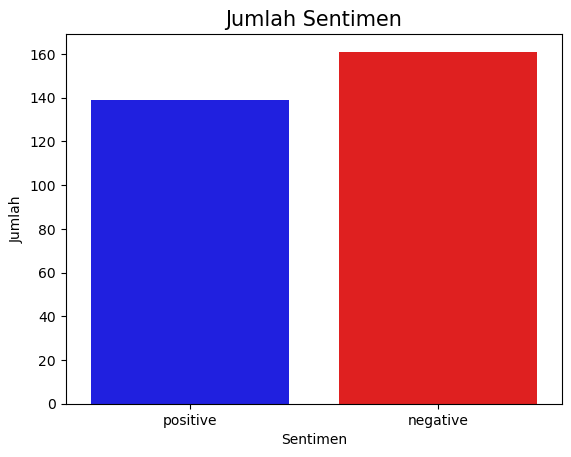

In [76]:
plt.title('Jumlah Sentimen', size=15)
sns.countplot(data=df, x='Sentiment', palette=['blue', 'red'])
plt.ylabel('Jumlah')
plt.xlabel('Sentimen')
plt.show()

✨Insight:
- Jumlah sentimen twit dengan sentimen negatif lebih banyak dibandingkan twit dengan sentimen positif.
- Memberikan gambaran bahwa bentuk ketidakpuasan masyarakat terhadap layanan lebih banyak dibandingkan apresiasi terhadap layanan.

#### **2. 10 kata Teratas Pada Setiap Sentimen**

In [79]:
df_neg = kamus(df[df['Sentiment']=='negative']['tweet_stem']).reset_index()
df_pos = kamus(df[df['Sentiment']=='positive']['tweet_stem']).reset_index()
df_neg = df_neg.sort_values(by='freq', ascending=False).head(10)
df_pos = df_pos.sort_values(by='freq', ascending=False).head(10)

Text(0.5, 0.98, '10 Kata Terbanyak')

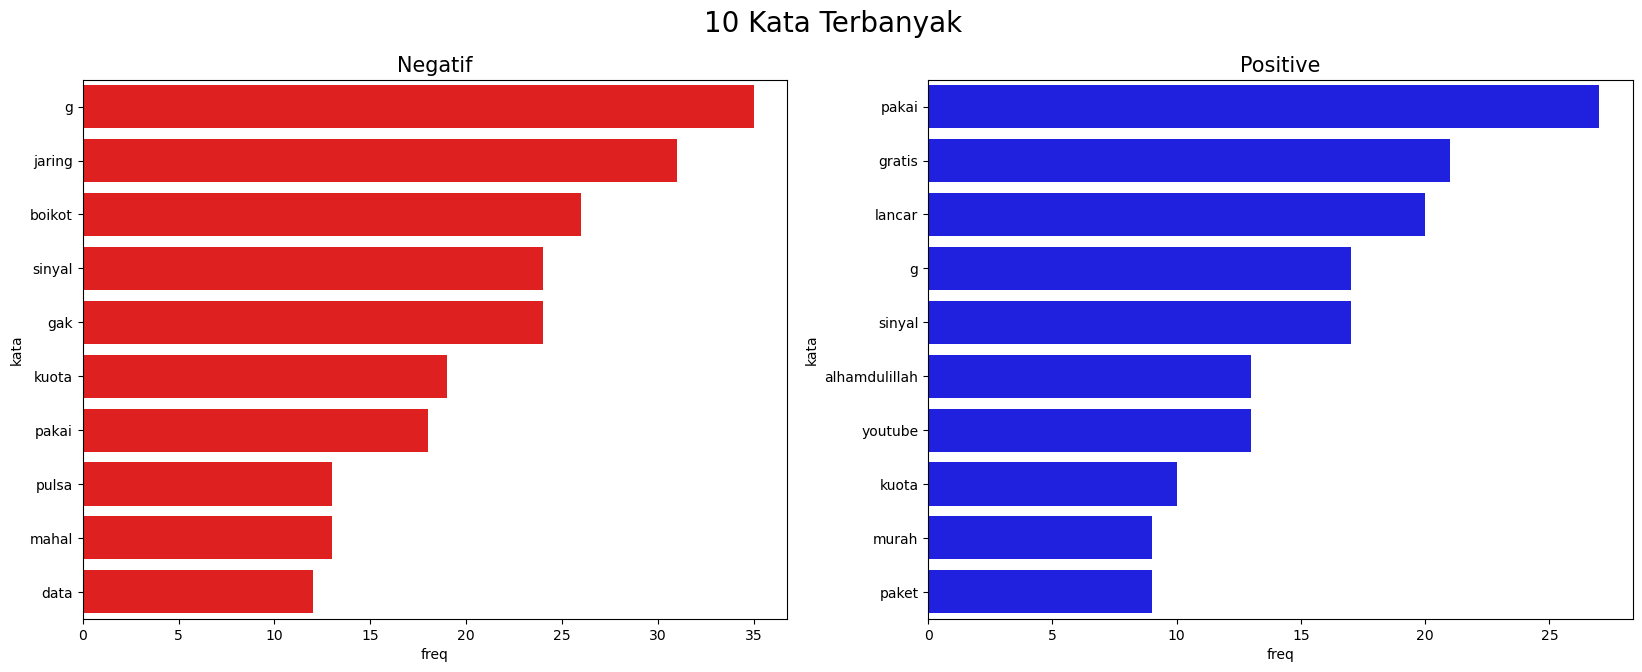

In [84]:
plt.figure(figsize=(20,7))

plt.subplot(1,2,1) # n baris, n kolom, position 1
sns.barplot(data=df_neg, x='freq', y='kata', color='red')
plt.title('Negatif', size=15)

plt.subplot(1,2,2) # n baris, n kolom, position 2
sns.barplot(data=df_pos, x='freq', y='kata', color='blue')
plt.title('Positive', size=15)

plt.suptitle('10 Kata Terbanyak', size = 20)

#### **3. Negative Wordcloud**

In [85]:
def plot_cloud(wordcloud):
    # Set figure size
    plt.figure(figsize=(20, 10))
    # Display image
    plt.imshow(wordcloud)
    # No axis details
    plt.axis("off")

In [86]:
word_cloud_neg = WordCloud(background_color='white').generate(str(df[df['Sentiment']=='negative']['tweet_stem']))

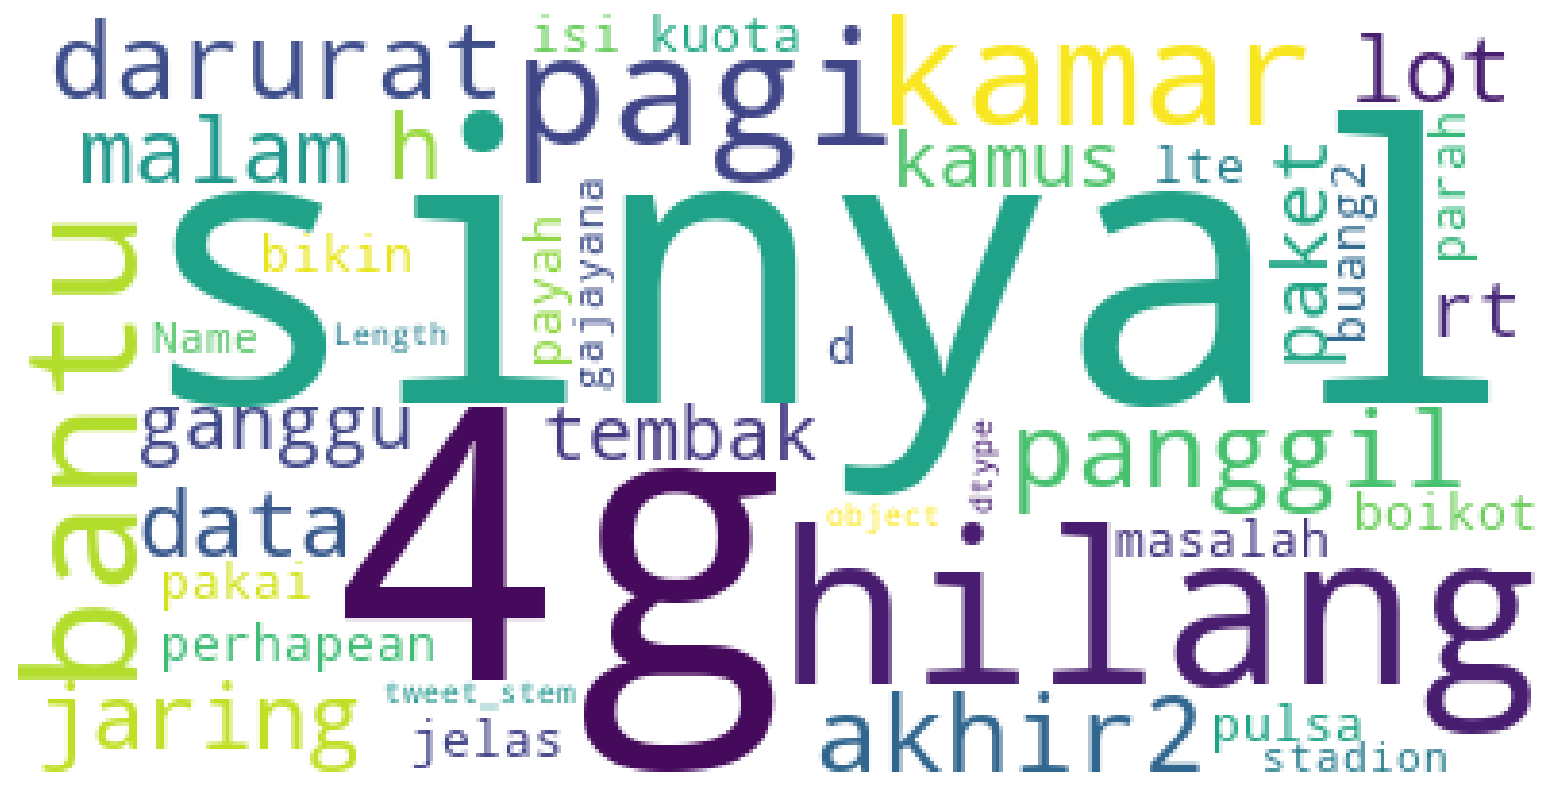

In [87]:
plot_cloud(word_cloud_neg)

#### **4. Positive Wordcloud**

In [88]:
word_cloud_pos = WordCloud(background_color='white').generate(str(df[df['Sentiment']=='positive']['tweet_stem']))

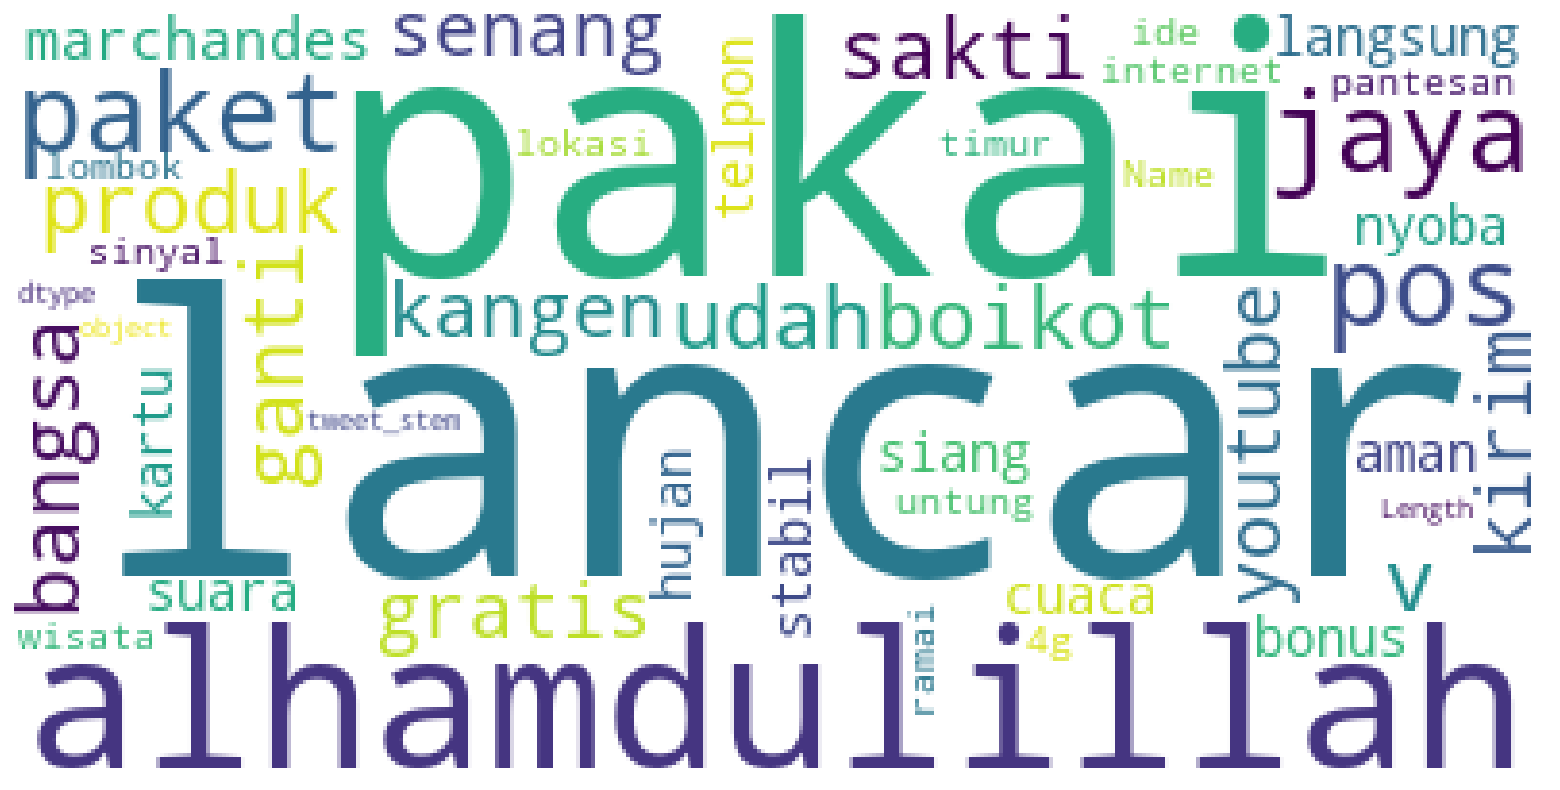

In [89]:
plot_cloud(word_cloud_pos)

## **📕 Kesimpulan**
Beradsarkan analisis, sentimen publik terhadap layanan provider Z terbagia tas sentimen positif dan negatif dengan jumlah sentimen negatif lebih banyak. Berikut mrupakan berapa indikasi adanya permasalahan dan apresiasi terhadap layanan berdasarkan kategori sentimennya.

- Sentimen Negatif:
    + Kata-kata seperti "lama", "error", "tidak", "lelet", "buruk" (misalnya) menunjukkan ketidakpuasan terhadap pelayanan atau kualitas produk.
    + Munculnya kata seperti "gangguan", "jaringan", "tidak bisa" menandakan adanya isu teknis.
    + Kata "tidak jelas", "bingung", atau "susah" bisa menunjukkan kurangnya kejelasan dalam sistem atau komunikasi.

- Sentimen Positif:
    + Kata seperti "cepat", "mudah", "mantap", "bagus" biasanya menunjukkan kepuasan atas efisiensi layanan.
    + Kata seperti "ramah", "terima kasih", "bantu" mengindikasikan pengalaman positif terhadap CS atau support.
    + Munculnya kata seperti "nyaman", "senang", "bagus", menunjukkan pelanggan puas secara keseluruhan.

## **✨ Rekomendasi Strategi Bisnis Untuk Peningkatan Layanan**
**Apa saja yang bisa diimprove??**

1. Perbaikan Jaringan Sinyal
    - Fokus pada peningkatan kualitas jaringan di area dengan laporan sinyal lemah.
    - Investasi dalam peningkatan infrastruktur jaringan untuk mengatasi masalah sinyal lemah dan koneksi lambat.

2. Transparansi Kuota dan Biaya 
    - Berikan informasi lebih jelas tentang penggunaan kuota dan biaya tambahan agar pelanggan tidak merasa dirugikan.

3. Tanggapan Cepat Terhadap Keluhan
    - Tingkatkan responsivitas tim layanan pelanggan terhadap keluhan melalui media sosial dan saluran komunikasi lainnya.
    - Berikan pelatihan kepada staf agar dapat menangani masalah dengan lebih baik.
    
4. Kampanye Edukasi Pelanggan
    - Lakukan kampanye edukasi tentang cara menggunakan produk secara efektif serta menjelaskan kebijakan terkait kuota dan tarif.
---
**Bagaimana membuat citra perusahaan jadi lebih baik dengan mendengarkan keresahan yang selama ini dihadapi customer.**
1. Corporate Social Responsibility (CSR)
    - Implementasikan program CSR yang relevan dengan isu sosial terkini sebagai bentuk kepedulian terhadap masyarakat luas.

2. Keterlibatan Masyarakat
    - Libatkan komunitas dalam pengambilan keputusan terkait produk baru atau perubahan kebijakan melalui survei atau forum diskusi online.
    - Adakan acara komunitas untuk mendengarkan langsung masukan dari pengguna.

3. Membangun Hubungan Emosional
    - Tunjukkan bahwa perusahaan peduli terhadap pengalaman pelanggan dengan merespons keluhan secara langsung dan personal.
    - Ceritakan kisah sukses dari perubahan positif berdasarkan *feedback* pelanggan.

4. *Feedback* berkelanjutan
    - Ciptakan saluran *feedback*  yang berkelanjutan agar pelanggan merasa didengar sepanjang waktu, bukan hanya saat ada masalah besar.
    - Gunakan platform digital untuk mengumpulkan saran dan ide dari pengguna secara rutin.